# Download generator weights

In [1]:
!gdown --id 1-4liMOrMxY2HTy5FPmDr9MjWPjM-P6iy

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1-4liMOrMxY2HTy5FPmDr9MjWPjM-P6iy
From (redirected): https://drive.google.com/uc?id=1-4liMOrMxY2HTy5FPmDr9MjWPjM-P6iy&confirm=t&uuid=24d61044-3f9a-4f44-9f4e-53a5455c0848
To: /content/netG_epoch_5.pth
100% 80.3M/80.3M [00:04<00:00, 19.4MB/s]


In [4]:
!gdown --id 1xEr7gLFTfqcaqJ8rkkG0vEFkx-PvJOlc

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1xEr7gLFTfqcaqJ8rkkG0vEFkx-PvJOlc
From (redirected): https://drive.google.com/uc?id=1xEr7gLFTfqcaqJ8rkkG0vEFkx-PvJOlc&confirm=t&uuid=3810c12b-ddbc-43cd-8538-df258ec2c6a5
To: /content/netG_epoch_5_G2.pth
100% 229M/229M [00:02<00:00, 102MB/s]


# load Generators

In [5]:
from model import *

class Struct:
    def __init__(self, **entries):
        self.__dict__.update(entries)

In [6]:
import torch

# Define paths to your model weights
stage1_weight_path = "/content/netG_epoch_5.pth"
stage2_weight_path = "/content/netG_epoch_5_G2.pth"

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create Stage 1 Generator
STAGE1_G = STAGE1_G()  # Instantiate the model class

# Load weights from stage1.pth
STAGE1_G.load_state_dict(torch.load(stage1_weight_path, map_location=torch.device('cpu')))

# Set Stage 1 to evaluation mode (optional but recommended)
STAGE1_G.eval()

STAGE1_G(
  (ca_net): CA_NET(
    (fc): Linear(in_features=1024, out_features=256, bias=True)
    (relu): ReLU()
  )
  (fc): Sequential(
    (0): Linear(in_features=228, out_features=24576, bias=False)
    (1): BatchNorm1d(24576, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (upsample1): Sequential(
    (0): Upsample(scale_factor=2.0, mode='nearest')
    (1): Conv2d(1536, 768, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (2): BatchNorm2d(768, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU(inplace=True)
  )
  (upsample2): Sequential(
    (0): Upsample(scale_factor=2.0, mode='nearest')
    (1): Conv2d(768, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (2): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU(inplace=True)
  )
  (upsample3): Sequential(
    (0): Upsample(scale_factor=2.0, mode='nearest')
    (1): Conv2

In [7]:
# Create Stage 2 Generator


STAGE2_G = STAGE2_G(STAGE1_G)  # Pass Stage 1 model to Stage 2

# Load weights from stage2.pth
STAGE2_G.load_state_dict(torch.load(stage2_weight_path, map_location=torch.device('cpu')))

# Set Stage 2 to evaluation mode (optional but recommended)
STAGE2_G.eval()


STAGE2_G(
  (STAGE1_G): STAGE1_G(
    (ca_net): CA_NET(
      (fc): Linear(in_features=1024, out_features=256, bias=True)
      (relu): ReLU()
    )
    (fc): Sequential(
      (0): Linear(in_features=228, out_features=24576, bias=False)
      (1): BatchNorm1d(24576, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (upsample1): Sequential(
      (0): Upsample(scale_factor=2.0, mode='nearest')
      (1): Conv2d(1536, 768, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (2): BatchNorm2d(768, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): ReLU(inplace=True)
    )
    (upsample2): Sequential(
      (0): Upsample(scale_factor=2.0, mode='nearest')
      (1): Conv2d(768, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (2): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): ReLU(inplace=True)
    )
    (upsample3): Sequential

# Generation

In [8]:
!pip install sentence-transformers==2.2.2
from sentence_transformers import SentenceTransformer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cach

In [9]:
model = SentenceTransformer('intfloat/e5-large-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


.gitattributes:   0%|          | 0.00/1.48k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/201 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/67.8k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

handler.py:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

# Generating picture

In [14]:
text = input("what do you want to generate?:  ")

what do you want to generate?:  a bird flying over a house


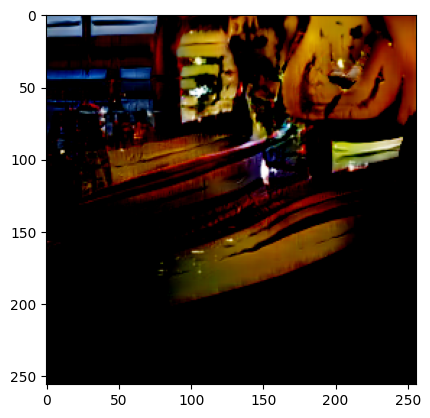

In [15]:
import matplotlib.pyplot as plt

text_embeddings = model.encode(text)
noise = torch.randn(1, 100)
text_embeddings = torch.tensor(text_embeddings).unsqueeze(0)

with torch.no_grad():  # Disable gradient calculation for stage 1 generator
    stage1_img, stage2_img, _, _ = STAGE2_G(text_embeddings, noise)


# Detach the tensor and convert it to a NumPy array
stage1_img_np = stage2_img.detach().numpy()

# Squeeze the batch dimension if it's of size 1
if stage1_img_np.shape[0] == 1:
    stage1_img_np = stage1_img_np.squeeze(0)  # Remove the batch dimension

# Assuming the image is in a channels-first format (C, H, W),
# you might need to transpose it to (H, W, C) for Matplotlib
stage1_img_np = stage1_img_np.transpose(1, 2, 0)

# Display the image
plt.imshow(stage1_img_np)
plt.show()